In [4]:
setwd("/mnt/public3/chaohy/data/demo/dum/")
source("~/scripts/Rcodes_chy.R")
library(ggplot2)

In [40]:
timefasterqDump <- read.table("timefasterqDump.log", header = F, sep = "\t")
head(timefasterqDump)

,V1,V2,V3
,<int>,<chr>,<int>
1,2,Convert SRA to FASTQ,74
2,2,Compress FASTQ,803
3,3,Convert SRA to FASTQ,66
4,3,Compress FASTQ,528
5,4,Convert SRA to FASTQ,64
6,4,Compress FASTQ,404


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


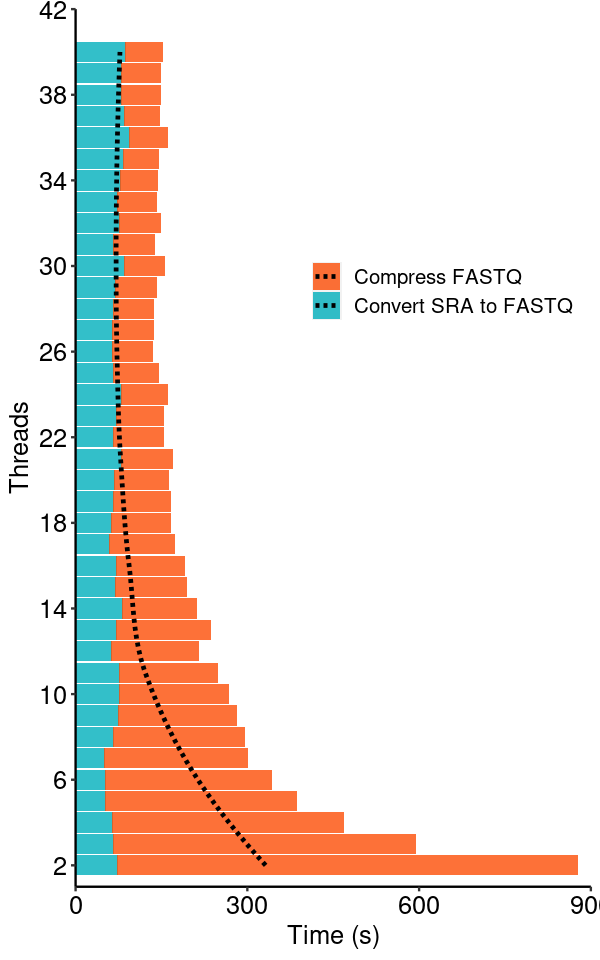

In [106]:
options(repr.plot.width = 5, repr.plot.height = 8)
ggplot(timefasterqDump, aes(x = V1, y = V3, fill = V2)) +
  geom_bar(stat = "identity", position = "stack", alpha = 0.8) +
#   geom_point(aes(group = V2), position = position_stack(vjust = 1), color = "#e7b800") + # 添加点
#   geom_line(aes(group = V2), position = position_stack(vjust = 1), color = "#fc4e07") + # 添加折线图
  geom_smooth(aes(group = 1), method = "loess", se = FALSE, color = "black",linetype=2) + # 平滑曲线
  labs(x = "Threads", y = "Time (s)", fill = "") +
  scale_fill_manual(values = c("Convert SRA to FASTQ" = "#00afbb", "Compress FASTQ" = "#fc4e07")) +
  theme_chy() + 
  scale_x_continuous(limits = c(1,42), breaks = seq(2,42,4),expand = c(0,0))+
  scale_y_continuous(limits = c(0,900), breaks = seq(0,900,300),expand = c(0,0))+
  theme(axis.text = element_text(size = 15, colour = "black"), legend.position = c(0.7, 0.7))+
  coord_flip()